# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Carga-de-datos" data-toc-modified-id="Carga-de-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Carga de datos</a></div><div class="lev1 toc-item"><a href="#Ver-Periodicidad" data-toc-modified-id="Ver-Periodicidad-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ver Periodicidad</a></div><div class="lev1 toc-item"><a href="#Modelos-de-periodicidad-anual-+-ganancia" data-toc-modified-id="Modelos-de-periodicidad-anual-+-ganancia-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modelos de periodicidad anual + ganancia</a></div><div class="lev1 toc-item"><a href="#Modelos-autoregresivos" data-toc-modified-id="Modelos-autoregresivos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelos autoregresivos</a></div>

In [1]:
%matplotlib

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

Using matplotlib backend: Qt5Agg


# Carga de datos

In [2]:
# load the provided data
train_features = pd.read_csv('./data/dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('./data/dengue_labels_train.csv',
                           index_col=[0,1,2])

In [3]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [4]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


The [problem description](https://www.drivendata.org/competitions/44/page/82/) gives a good overview of the available variables, but we'll look at the head of the data here as well:

In [5]:
sj_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
     19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
     20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
     21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
     22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
1990 18                         12.42             297.572857   
     19                         22.82             298.211429   
     20                         34.54             298.781429   
     21                         15.36             298.987143   
     22                          7.52             299.518571   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
1990 18                     297.742857                   292.414286   
     19                     298.442857                   293.951429   
     20                     298.878571                   295.434286   
     21                     299.228571                   295.310000   
     22                     299.664286                   295.821429   

                 reanalysis_max_air_temp_k        ...          \
year weekofyear                                   ...           
1990 18                              299.8        ...           
     19                              300.9        ...           
     20                              300.5        ...           
     21                              301.4        ...           
     22                              301.9        ...           

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
1990 18                                    32.00   
     19                                    17.94   
     20                                    26.10   
     21                                    13.90   
     22                                    12.20   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
1990 18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
1990 18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21                   27.471429                 6.771429   
     22                   28.942857                 9.

There are _a lot_ of climate variables here, but the first thing that we'll note is that the `week_start_date` is included in the feature set. This makes it easier for competitors to create time based features, but for this first-pass model, we'll drop that column since we shouldn't use it as a feature in our model.

In [6]:
# Remove `week_start_date` string.
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

Next, let's check to see if we are missing any values in this dataset:

In [7]:
# Null check
pd.isnull(sj_train_features).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

In [8]:
(sj_train_labels
     .plot
     .line(lw=0.8))

plt.title('San juan Cases')
plt.xlabel('Time');

In [9]:
# Completo NANs
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

# Ver Periodicidad

In [10]:
semana = sj_train_labels.index.get_level_values(1)
casos = sj_train_labels.values
ax = sj_train_labels.groupby(level=1).median().plot(label='mediana')
sj_train_labels.groupby(level=1).quantile(0.25).plot(ax=ax, label='q25')
sj_train_labels.groupby(level=1).quantile(0.75).plot(ax=ax, label='q75')
ax.plot(semana, casos,'.')
plt.title('Periodicidad anual San Juan')
plt.legend();

In [11]:
semana = iq_train_labels.index.get_level_values(1)
casos = iq_train_labels.values
ax = iq_train_labels.groupby(level=1).median().plot(label='mediana')
iq_train_labels.groupby(level=1).quantile(0.25).plot(ax=ax, label='q25')
iq_train_labels.groupby(level=1).quantile(0.75).plot(ax=ax, label='q75')
ax.plot(semana, casos,'.')
plt.title('Periodicidad anual Iquitos')

plt.legend();

In [12]:
# Butterworth filter
import scipy.signal

b, a = scipy.signal.butter(4, [0.0575, 0.096], btype='bandpass')
x = sj_train_features.reanalysis_tdtr_k
media = np.mean(x)
x.plot()
plt.plot(media + scipy.signal.filtfilt(b,a,x))

In [13]:
columns = sj_train_features.columns
recols = columns[columns.str.startswith('reanalysis')]
frec = np.linspace(0,52.15,len(sj_train_features))
for col in recols:
    y = np.abs(np.fft.fft(sj_train_features[col]))
    y = y/y[18]
    plt.plot(frec, y, label=col)
    
plt.xlim(0,5)
plt.ylim(0,3)
plt.legend()
plt.ylabel(u'Intensidad normalizada a periodicidad anual')
plt.xlabel(u'Frecuencia[1/años]')

In [14]:
# FFT de la cantidad de casos 
plt.figure()
x = sj_train_labels
frec = np.linspace(0,52.15,len(x))
fy = np.fft.fft(np.squeeze(x.values))
plt.vlines([1./3,1./2, 1./4, 1./5],0,15000)
plt.plot(frec, np.abs(fy))

In [15]:
# Cantidad de casos con separadores de anios

sj_train_labels.plot()
plt.vlines(np.arange(0,len(sj_train_labels),52.12),0,100)

In [16]:
# Celda anterior pero filtrada alrededor de 1.5
W = np.array([0, 3])/26.07
b, a = scipy.signal.butter(4, 3/26.7, btype='low')
x = np.squeeze(sj_train_labels.values)
media = np.mean(x)
plt.plot(x)
plt.plot(0 + scipy.signal.filtfilt(b,a,x))


In [17]:
precipcols = columns[sj_train_features.columns.str.contains('prec')]
tempcols = columns[sj_train_features.columns.str.contains('temp')]
meanprecip = sj_train_features[precipcols].mean(axis=1)
meantemp = sj_train_features[tempcols].mean(axis=1)

ax = pd.rolling_mean(meanprecip,1).plot()
pd.rolling_mean(meantemp,1).plot()
sj_train_labels.plot(ax=ax)


In [33]:
# Ploteo por anio
fig = plt.figure()
ax = fig.add_subplot(111)
for year in sj_train_labels.index.levels[0]:
    y = sj_train_labels.loc[year,:]
    #y = y / y.max()
    y.plot(ax=ax)
    

TypeError: Empty 'DataFrame': no numeric data to plot

# Modelos de periodicidad anual + ganancia

In [80]:
# Quedarse solo con la periodicidad anual SAN JUAN
sj_fft = np.fft.fft(np.squeeze(sj_train_labels.values))
freqs = np.fft.fftfreq(len(sj_train_labels),7./365)
sj_fft[np.abs(freqs-freqs.astype(int)) > 0.1] = 0
sj_fft[freqs<0.1]=0
sj_filt = np.real(np.fft.ifft(sj_fft))
sj_filt = sj_filt - np.amin(sj_filt)
plt.plot(sj_train_labels.values)
plt.plot(sj_filt)


In [67]:
# Quedarse solo con la periodicidad anual SAN JUAN
iq_fft = np.fft.fft(np.squeeze(iq_train_labels.values))
freqs = np.fft.fftfreq(len(iq_train_labels),7./365)
iq_fft[np.abs(freqs-freqs.astype(int)) > 0.1] = 0
iq_fft[freqs<0.1]=0
iq_filt = np.fft.ifft(iq_fft)
plt.plot(iq_train_labels.values)
plt.plot(iq_filt-np.amin(iq_filt))

In [88]:
plt.plot(np.squeeze(sj_train_labels.values)/sj_filt)
plt.plot(sj_train_labels.values/np.amax(sj_train_labels.values)*125)

# Modelos autoregresivos

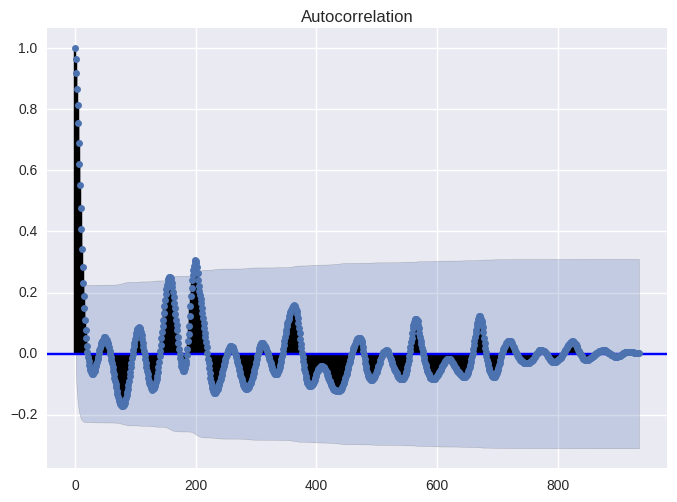

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sj_train_labels)

In [26]:
from statsmodels.tsa.ar_model import AR
model = AR(sj_train_labels.values)
model_fit = model.fit()


In [32]:
plt.plot(model_fit.predict(936,1200))

In [31]:
len(sj_train_labels)

936